In [2]:
import math
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer


# Implementation of Naive Baye's Classifier from Scratch

In [7]:
dataSet = pd.read_csv("/content/IMDB Dataset.csv", quoting=3, on_bad_lines='skip')

In [8]:
dataSet

,,,,,,,,,,,,,,,,,,,,,,,,,,review,sentiment
"""One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right",as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence,which set in right from the word GO. Trust me,this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs,sex or violence. Its is hardcore,in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City,an experimental section of the prison where all the cells have glass fronts and face inwards,so privacy is not high on the agenda. Em City is home to many..Aryans,Muslims,gangstas,Latinos,Christians,Italians,Irish and more....so scuffles,death stares,dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences,forget charm,forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal,I couldn't say I was ready for it,but as I watched more,I developed a taste for Oz,and got accustomed to the high levels of graphic violence. Not just violence,but injustice (crooked guards who'll be sold out for a nickel,inmates who'll kill on order and get away with it,well mannered,middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz,you may become comfortable with what is uncom...,positive
"""A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting",and sometimes discomforting,"sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only """"has got all the polari"""" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries",not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which,rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses,"particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""I thought this was a wonderful way to spend time on a too hot summer weekend",sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic,but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction,I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson,"in this she managed to tone down her """"sexy"""" image and jumped right into a average",but spirited young woman.<br /><br />This may not be the crown jewel of his career,"but it was wittier than """"Devil Wears Prada"""" and more interesting than """"Superman"""" a great comedy to go see with friends.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<b

In [9]:
X = dataSet['review']


In [10]:
import nltk

from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


In [11]:
nltk.download('stopwords')

# Get the list of stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
import re

def preprocess(text):
    # Handle potential float values
    if isinstance(text, float):
        text = str(text)  # Convert float to string

    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove stop words
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    # Convert to lowercase
    text = text.lower()  # Correct the typo here (text.low -> text.lower)
    return text

X = X.apply(preprocess)

In [15]:
X = X.apply(preprocess)


In [16]:
dataSet.head(1)


,,,,,,,,,,,,,,,,,,,,,,,,,,review,sentiment
"""One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right",as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence,which set in right from the word GO. Trust me,this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs,sex or violence. Its is hardcore,in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City,an experimental section of the prison where all the cells have glass fronts and face inwards,so privacy is not high on the agenda. Em City is home to many..Aryans,Muslims,gangstas,Latinos,Christians,Italians,Irish and more....so scuffles,death stares,dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences,forget charm,forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal,I couldn't say I was ready for it,but as I watched more,I developed a taste for Oz,and got accustomed to the high levels of graphic violence. Not just violence,but injustice (crooked guards who'll be sold out for a nickel,inmates who'll kill on order and get away with it,well mannered,middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz,you may become comfortable with what is uncom...,positive


In [17]:
X

,,,,,,,,,,,,,,,,,,,,,,,,,,review
"""One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right",as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence,which set in right from the word GO. Trust me,this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs,sex or violence. Its is hardcore,in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City,an experimental section of the prison where all the cells have glass fronts and face inwards,so privacy is not high on the agenda. Em City is home to many..Aryans,Muslims,gangstas,Latinos,Christians,Italians,Irish and more....so scuffles,death stares,dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences,forget charm,forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal,I couldn't say I was ready for it,but as I watched more,I developed a taste for Oz,and got accustomed to the high levels of graphic violence. Not just violence,but injustice (crooked guards who'll be sold out for a nickel,inmates who'll kill on order and get away with it,well mannered,middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz,may become comfortable uncomfortable viewingth...
"""A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting",and sometimes discomforting,"sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only """"has got all the polari"""" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries",not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which,rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses,"particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
"""I thought this was a wonderful way to spend time on a too hot summer weekend",sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic,but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction,I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson,"in this she managed to tone down her """"sexy"""" image and jumped right into a average",but spirited young woman.<br /><br />This may not be the crown jewel of his career,"but it was wittier than """"Devil Wears Prada"""" and more interesting than """"Superman"""" a great comedy to go see with friends.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
"""Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is sl

In [ ]:
""""vectorizer = TfidfVectorizer()

# Step 2: Fit and transform the text data
X_tfidf = vectorizer.fit_transform(X.values)

# Step 3: Get the vocabulary size (equivalent to tokenizer.word_index)
vocab_size = len(vectorizer.vocabulary_) + 1  # +1 to account for padding like in the original code

X = X_tfidf.toarray()"""

'"vectorizer = TfidfVectorizer()\n\n# Step 2: Fit and transform the text data\nX_tfidf = vectorizer.fit_transform(X.values)\n\n# Step 3: Get the vocabulary size (equivalent to tokenizer.word_index)\nvocab_size = len(vectorizer.vocabulary_) + 1  # +1 to account for padding like in the original code\n\nX = X_tfidf.toarray()'

In [18]:
tokenizer = Tokenizer(split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
vocab_size = len(tokenizer.word_index) + 1
vocab_size

1763

In [19]:
dataSet['sentiment'] = (dataSet['sentiment'] == 'positive').astype(int)
Y = dataSet['sentiment']

In [20]:
Y

,,,,,,,,,,,,,,,,,,,,,,,,,,sentiment
"""One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right",as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence,which set in right from the word GO. Trust me,this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs,sex or violence. Its is hardcore,in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City,an experimental section of the prison where all the cells have glass fronts and face inwards,so privacy is not high on the agenda. Em City is home to many..Aryans,Muslims,gangstas,Latinos,Christians,Italians,Irish and more....so scuffles,death stares,dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences,forget charm,forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal,I couldn't say I was ready for it,but as I watched more,I developed a taste for Oz,and got accustomed to the high levels of graphic violence. Not just violence,but injustice (crooked guards who'll be sold out for a nickel,inmates who'll kill on order and get away with it,well mannered,middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz,1
"""A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting",and sometimes discomforting,"sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only """"has got all the polari"""" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries",not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which,rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses,"particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
"""I thought this was a wonderful way to spend time on a too hot summer weekend",sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic,but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction,I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson,"in this she managed to tone down her """"sexy"""" image and jumped right into a average",but spirited young woman.<br /><br />This may not be the crown jewel of his career,"but it was wittier than """"Devil Wears Prada"""" and more interesting than """"Superman"""" a great comedy to go see with friends.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
"""Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly",Jake deci

In [21]:
import numpy as np

# Define the Naive Bayes functions

def calc_prior(features, target):
    '''
    Prior probability P(y)
    Calculate prior probabilities for each class (P(y))
    '''
    classes = np.unique(target)
    prior_prob = {}

    # Count the instances of each class and compute the prior probabilities
    for cls in classes:
        prior_prob[cls] = np.sum(target == cls) / len(target)

    return prior_prob

def calc_statistics(features, target):
    '''
    Calculate mean and variance for each feature-column in X based on class y
    Return statistics in the form of mean and variance for each class
    '''
    classes = np.unique(target)
    mean = {}
    variance = {}

    # Calculate mean and variance per class
    for cls in classes:
        class_features = features[target == cls]
        mean[cls] = np.mean(class_features, axis=0)
        variance[cls] = np.var(class_features, axis=0)

    return mean, variance

def gaussian_density(x, mean, var):
    '''
    Calculate the Gaussian density function (Normal distribution)
    For each x, compute the probability density function with given mean and variance
    '''
    eps = 1e-6  # Small value to avoid division by zero
    coeff = 1.0 / np.sqrt(2.0 * np.pi * (var + eps))
    exponent = np.exp(- (np.power(x - mean, 2) / (2 * (var + eps))))

    return coeff * exponent + eps

def calc_posterior(features, target, x):
    '''
    Posterior P(y|X) = P(X|y) * P(y)
    Compute posterior probabilities for each class and return the one with the highest probability
    '''
    prior_prob = calc_prior(features, target)
    mean, variance = calc_statistics(features, target)
    posteriors = []

    # For each class, calculate the posterior probability
    for cls in np.unique(target):
        prior = np.log(prior_prob[cls])
        conditional = np.sum(np.log(gaussian_density(x, mean[cls], variance[cls])))
        posterior = prior + conditional
        posteriors.append(posterior)

    # Return class with highest posterior probability
    return np.argmax(posteriors)

def predict(features, target, X_test):
    '''
    Predict the class for each sample in X_test
    '''
    y_pred = [calc_posterior(features, target, x) for x in X_test]
    return y_pred

def accuracy(y_test, y_pred):
    '''
    Calculate the accuracy of predictions by comparing them with true labels
    '''
    return np.mean(y_test == y_pred)





In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
# Make predictions
y_pred = predict(X_train, y_train, X_test)

# Calculate accuracy
acc = accuracy(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.996195652173913


In [24]:
scratchAlgoMatrix = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=np.unique(y_test))

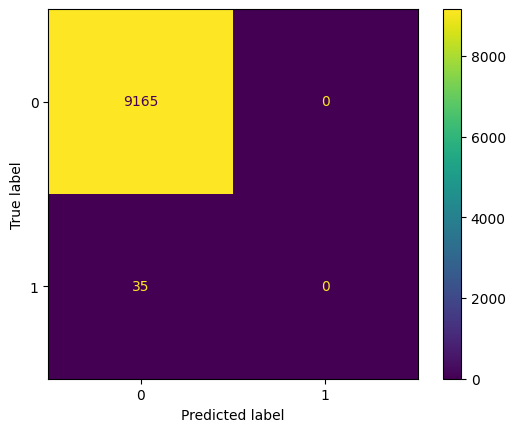

In [25]:
scratchAlgoMatrix.plot()

In [26]:
print("Accuracy Score:", accuracy(y_test, y_pred))

Accuracy Score: 0.996195652173913


In [27]:
print('Recall Score:', recall_score(y_test, y_pred, pos_label=1))

Recall Score: 0.0


In [28]:
print('Precision Score:', precision_score(y_test, y_pred, pos_label=1))


Precision Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Naive Bayes Classifier Using Built-In function

Built-in Model for Naive Bayes

In [29]:
model = GaussianNB()

In [30]:
model.fit(X_train, y_train)
y_pred_bulidin = model.predict(X_test)

In [31]:
builtInAlgoMatrix = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_bulidin))

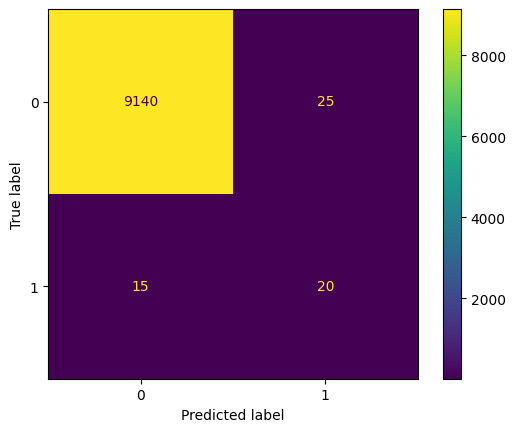

In [32]:
builtInAlgoMatrix.plot()

In [33]:
print('Accuracy Score:', accuracy_score(y_test,y_pred_bulidin))

Accuracy Score: 0.9956521739130435


In [34]:
print('Recall Score:', recall_score(y_test,y_pred_bulidin, pos_label=1))

Recall Score: 0.5714285714285714


In [35]:
print('Precision Score:', precision_score(y_test,y_pred_bulidin, pos_label=1))

Precision Score: 0.4444444444444444


---

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample corpus (list of reviews/sentences)
corpus = [
    "I love programming",
    "I love Python",
    "Python is great for programming",
    "I enjoy learning new programming languages"
]

# Step 1: Initialize the Tokenizer
tokenizer = Tokenizer()

# Step 2: Fit the Tokenizer on the text data (builds the word-to-index mapping)
tokenizer.fit_on_texts(corpus)

# Step 3: Convert the text to sequences of integers
sequences = tokenizer.texts_to_sequences(corpus)

# Print the word index
print("Word Index:", tokenizer.word_index)

# Print the sequences
print("Sequences:", sequences)

# Step 4 (optional): Pad the sequences to ensure uniform length
padded_sequences = pad_sequences(sequences, padding='post')
print("Padded Sequences:", padded_sequences)


Word Index: {'i': 1, 'programming': 2, 'love': 3, 'python': 4, 'is': 5, 'great': 6, 'for': 7, 'enjoy': 8, 'learning': 9, 'new': 10, 'languages': 11}
Sequences: [[1, 3, 2], [1, 3, 4], [4, 5, 6, 7, 2], [1, 8, 9, 10, 2, 11]]
Padded Sequences: [[ 1  3  2  0  0  0]
 [ 1  3  4  0  0  0]
 [ 4  5  6  7  2  0]
 [ 1  8  9 10  2 11]]
